In [1]:
import numpy as np

import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from scipy import misc

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

In [3]:
X = []
Y = []
for item in forest_data_path:
    X.append(misc.imread(item))
    Y.append(1)

for item in tallbuilding_data_path:
    X.append(misc.imread(item))
    Y.append(2)
    
cC = []
for item in highway_data_path:
    X.append(misc.imread(item))
    Y.append(3)
    
# cA = modify_x(np.array(cA))
# cB = modify_x(np.array(cB))
# cC = modify_x(np.array(cC))

X = np.array(X)/255
Y = (np.array(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(Convolution2D(48, 11, strides=(4, 4), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Convolution2D(128, 5, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Convolution2D(196, 3, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Convolution2D(128, 3, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 48)        17472     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 48)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 48)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 27, 27, 128)       153728    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 196)       225988    
__________

In [18]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
Y_train_onehot = label_binarizer.fit_transform(Y_train)
Y_test_onehot = label_binarizer.fit_transform(Y_test)

In [20]:
model.compile('adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train, Y_train_onehot, epochs=25, batch_size = 256)

Epoch 1/25
660/660 [==============================] - 4s - loss: 1.3020 - acc: 0.5394     
Epoch 2/25
660/660 [==============================] - 4s - loss: 1.0745 - acc: 0.4742     
Epoch 3/25
660/660 [==============================] - 3s - loss: 1.2604 - acc: 0.3848     
Epoch 4/25
660/660 [==============================] - 3s - loss: 1.2391 - acc: 0.3773     
Epoch 5/25
660/660 [==============================] - 4s - loss: 1.1919 - acc: 0.3803     
Epoch 6/25
660/660 [==============================] - 4s - loss: 1.1003 - acc: 0.3788     
Epoch 7/25
660/660 [==============================] - 3s - loss: 1.0489 - acc: 0.4455     
Epoch 8/25
660/660 [==============================] - 3s - loss: 1.0711 - acc: 0.4455     
Epoch 9/25
660/660 [==============================] - 3s - loss: 0.9921 - acc: 0.5197     
Epoch 10/25
660/660 [==============================] - 3s - loss: 0.9373 - acc: 0.6030     
Epoch 11/25
660/660 [==============================] - 3s - loss: 0.8794 - acc: 0.5864   

In [11]:
metrics = model.evaluate(X_test, Y_test_onehot)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

284/284 [==============================] - 1s     
loss: 0.40385447253643625
acc: 0.8485915476167706


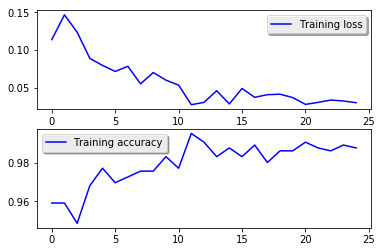

In [12]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)